## Import modules

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [51]:
# Importing the dataset as a dataframe
df = pd.read_csv('hospital_admissions_data.csv')

In [52]:
# Displaying the dataframe
df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31/03/2019,04/04/2019,86,F,U,O,Mar-19,5,...,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,4/1/2019,50,M,R,E,Mar-19,2,...,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31/03/2019,09/04/2019,82,M,U,E,Mar-19,10,...,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31/03/2019,03/04/2019,59,F,U,O,Mar-19,4,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Finding size of dataframe
df.shape

(15757, 56)

In [54]:
# Printing first 5 rows of the dataframe
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


## Data Cleaning & Preprocessing

In [55]:
# Renaming the columns of the dataframe to make them more readable
df = df.rename(columns={
    'SNO': 'patientid',
    'MRD No.': 'mrd_no',
    'D.O.A': 'admission_date',
    'D.O.D': 'discharge_date',
    'AGE': 'age',
    'GENDER': 'gender',
    'TYPE OF ADMISSION-EMERGENCY/OPD': 'admission_type',
    'DURATION OF STAY': 'duration_stay'
})

In [56]:
# Convert date columns to datetime format
df['admission_date'] = pd.to_datetime(df['admission_date'], errors='coerce')
df['discharge_date'] = pd.to_datetime(df['discharge_date'], errors='coerce')

In [57]:
# Extract day of the week
df['admission_day'] = df['admission_date'].dt.day_name()

In [58]:
# Printing first 5 rows of the dataframe
df.head()

,patientid,mrd_no,admission_date,discharge_date,age,gender,RURAL,admission_type,month year,duration_stay,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,admission_day
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Saturday
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,Saturday
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Saturday
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,Saturday
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,Saturday


In [65]:
# Remove rows with missing admission type or gender
df = df.dropna(subset=[
    'admission_date', 
    'discharge_date', 
    'admission_type', 
    'gender',
    'HB',                                  
    'TLC',                                 
    'PLATELETS',                           
    'GLUCOSE',                             
    'UREA',                           
    'CREATININE',                    
    'BNP',                           
    'RAISED CARDIAC ENZYMES',         
    'EF'])

In [62]:
# Displaying the dataframe
df

,patientid,mrd_no,admission_date,discharge_date,age,gender,RURAL,admission_type,month year,duration_stay,...,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,admission_day
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,Saturday
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,Saturday
5,6,234675,2017-04-01,2017-04-10,44,M,U,E,Apr-17,10,...,0,0,0,0,0,0,0,0,0,Saturday
6,7,234563,2017-04-01,2017-04-06,56,F,U,E,Apr-17,6,...,0,0,0,0,0,0,0,0,0,Saturday
10,11,233512,2017-04-01,2017-04-15,52,M,U,E,Apr-17,15,...,0,0,0,0,0,1,1,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,15586,656725,2019-03-24,2019-03-26,72,M,U,E,Mar-19,3,...,0,0,0,0,0,1,1,0,0,Sunday
15629,15630,465590,2019-03-26,2019-03-31,52,M,U,O,Mar-19,6,...,0,0,0,0,0,0,0,0,0,Tuesday
15727,15728,249706,2019-03-29,2019-04-08,88,M,U,E,Mar-19,11,...,0,0,0,0,0,0,1,0,0,Friday
15746,15747,699270,2019-03-30,2019-04-01,72,F,U,E,Mar-19,3,...,0,0,0,0,0,1,1,0,0,Saturday


In [66]:
# Standardize column values (e.g., strip spaces)
df['gender'] = df['gender'].str.strip().str.upper()
df['admission_type'] = df['admission_type'].str.strip().str.title()

In [67]:
# Perform any necessary data cleaning or handling of missing values.
df.isnull().sum()

patientid                          0
mrd_no                             0
admission_date                     0
discharge_date                     0
age                                0
gender                             0
RURAL                              0
admission_type                     0
month year                         0
duration_stay                      0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
E

In [68]:
# Confirm data types of all the attributes
df.dtypes

patientid                                   int64
mrd_no                                     object
admission_date                     datetime64[ns]
discharge_date                     datetime64[ns]
age                                         int64
gender                                     object
RURAL                                      object
admission_type                             object
month year                                 object
duration_stay                               int64
duration of intensive unit stay             int64
OUTCOME                                    object
SMOKING                                     int64
ALCOHOL                                     int64
DM                                          int64
HTN                                         int64
CAD                                         int64
PRIOR CMP                                   int64
CKD                                         int64
HB                                         object


## Exploratory Data Analysis

In [69]:
# 1. Total number of admissions
total_admissions = df.shape[0]
print(f"\n1. Total number of admissions: {total_admissions}")


1. Total number of admissions: 2885


In [70]:
# 2. Distribution of gender among admitted patients
print("\n2. Gender Distribution:")
print(df['gender'].value_counts())


2. Gender Distribution:
gender
M    1804
F    1081
Name: count, dtype: int64


In [71]:
# 3. Most frequently admitted age group
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
print("\n3. Most frequent age group:")
print(df['age_group'].value_counts())


3. Most frequent age group:
age_group
61-80     1442
41-60     1017
81-100     254
21-40      163
0-20         9
Name: count, dtype: int64


In [72]:
# 4. Most common admission types
print("\n4. Common Admission Types:")
print(df['admission_type'].value_counts())


4. Common Admission Types:
admission_type
E    2070
O     815
Name: count, dtype: int64


#### 5. Department with highest admissions — not in dataset. We'll skip this.

#### 6. Most frequent room type — also not in dataset. We'll skip this.

In [75]:
# 7. On which day of the week do most patients get admitted?
admission_day_counts = df['admission_day'].value_counts()
print("\n7. Admissions by Day of the Week:")
print(admission_day_counts)
print(f"\nMost admissions occur on: {admission_day_counts.idxmax()}")


7. Admissions by Day of the Week:
admission_day
Thursday     437
Monday       434
Tuesday      422
Friday       410
Wednesday    409
Saturday     401
Sunday       372
Name: count, dtype: int64

Most admissions occur on: Thursday


#### 8. Percentage with previous visits — also not in dataset. We'll skip this.

In [76]:
# 9. Difference in admission types across genders?
print("\n9. Admission Type by Gender:")
print(pd.crosstab(df['admission_type'], df['gender']))


9. Admission Type by Gender:
gender            F     M
admission_type           
E               785  1285
O               296   519


## Visualization of Data

In [77]:
# Explore the dataset by visualizing with clear features.
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

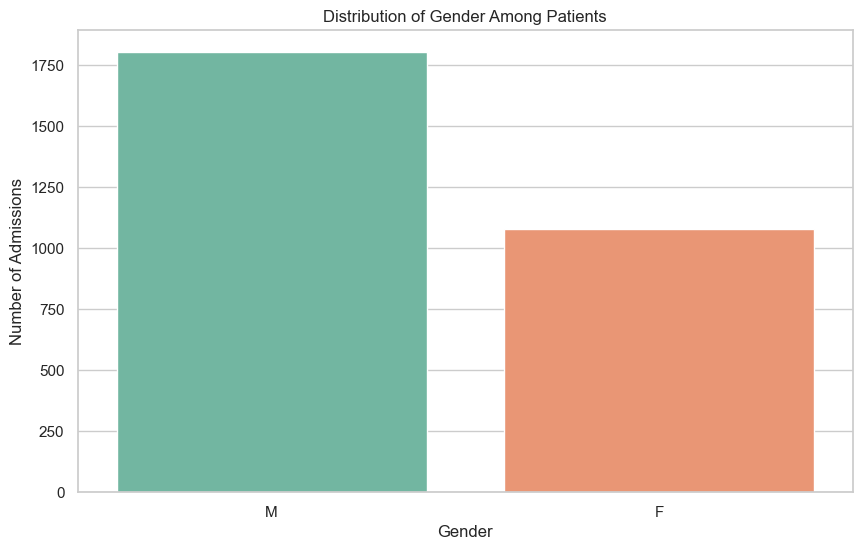

In [83]:
# Gender distribution plot
sns.countplot(data=df, x='gender', hue='gender', palette='Set2', legend=False)
plt.title('Distribution of Gender Among Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Admissions')
plt.show()

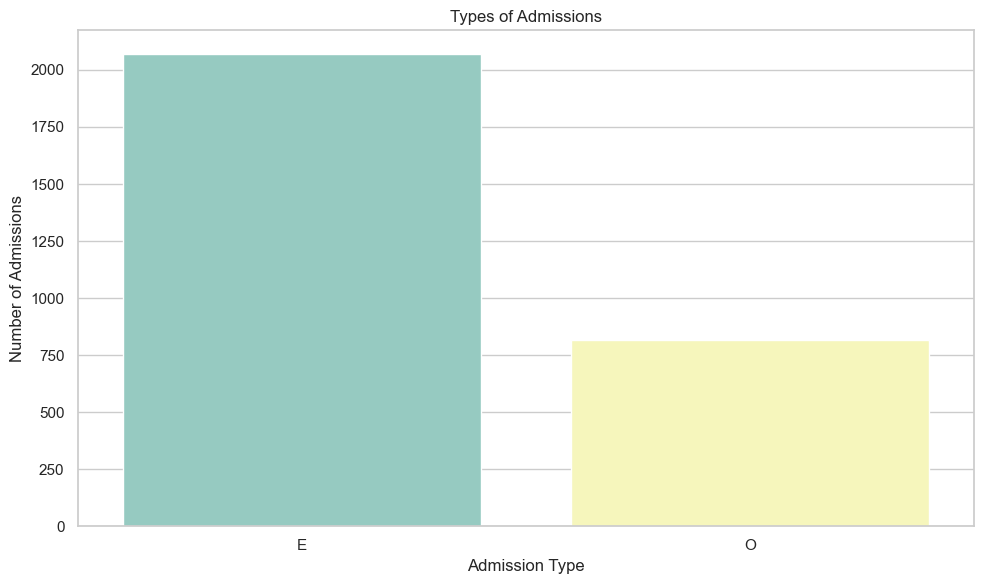

In [86]:
# Admission Type Distribution
sns.countplot(data=df, x='admission_type', hue='admission_type', palette='Set3', legend=False)

# Clean Titles and Labels
plt.title('Types of Admissions')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')

plt.tight_layout()
plt.show()

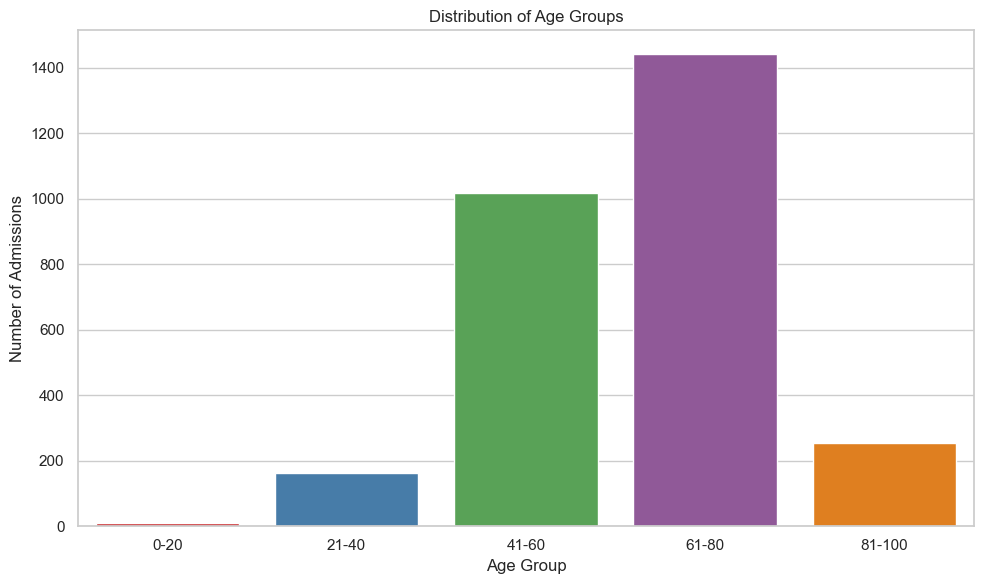

In [89]:
# Age Group

# Custom age order (if not already defined)
age_order = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Plot: Age Group Distribution
sns.countplot(data=df, x='age_group', hue='age_group', palette='Set1', order=age_order, legend=False)

# Titles and Labels
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Admissions')

# Improve layout
plt.tight_layout()
plt.show()

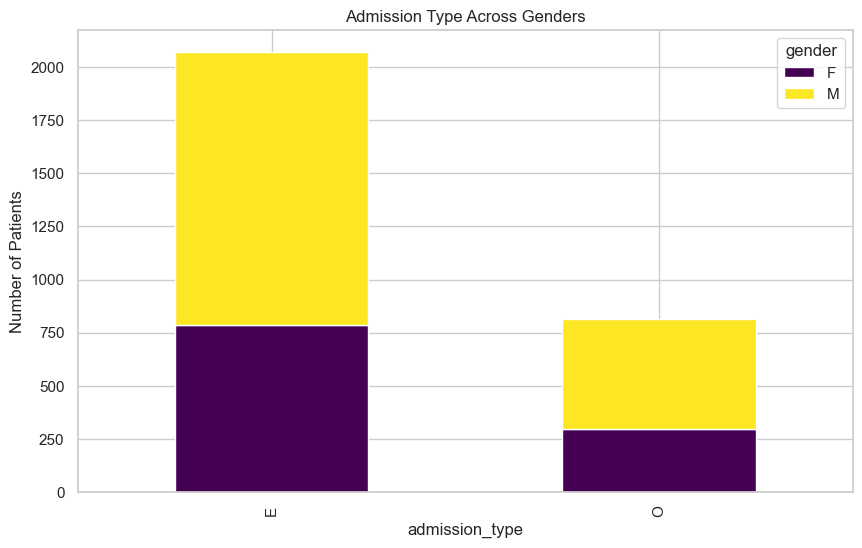

In [81]:
# Admission type vs Gender (Stacked Bar)
pd.crosstab(df['admission_type'], df['gender']).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Admission Type Across Genders')
plt.ylabel('Number of Patients')
plt.show()